In [87]:
#Directory changed to ./sqlite where opioid.db was created by sqlite3

import sqlite3 as sq3
import pandas as pd

ccon = sq3.connect("opioid.db")

population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)

# you have to close the connection
con.close

annual.head

<bound method NDFrame.head of              BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT countyfips
0          1    ABBEVILLE          SC  2006   877      363620      45001
1          2    ABBEVILLE          SC  2007   908      402940      45001
2          3    ABBEVILLE          SC  2008   871      424590      45001
3          4    ABBEVILLE          SC  2009   930      467230      45001
4          5    ABBEVILLE          SC  2010  1197      539280      45001
...      ...          ...         ...   ...   ...         ...        ...
27753  27754           NA          NV  2007   447      200600         NA
27754  27755           NA          NV  2008     5        2200         NA
27755  27756           NA          OH  2006    23        5100         NA
27756  27757           NA          PR  2006    10       17800         NA
27757  27758           NA          PR  2007     2        1300         NA

[27758 rows x 7 columns]>

In [88]:
annual[(annual.BUYER_STATE == "AR") & (annual.countyfips == "NA")]

,,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,NA
17430,17431,MONTGOMERY,AR,2007,597,241270,NA
17431,17432,MONTGOMERY,AR,2008,561,251760,NA
17432,17433,MONTGOMERY,AR,2009,554,244160,NA
17433,17434,MONTGOMERY,AR,2010,449,247990,NA
17434,17435,MONTGOMERY,AR,2011,560,313800,NA
17435,17436,MONTGOMERY,AR,2012,696,339520,NA
17436,17437,MONTGOMERY,AR,2013,703,382300,NA
17437,17438,MONTGOMERY,AR,2014,491,396900,NA


In [89]:
annual.loc[(annual.BUYER_STATE == "AR") & (annual.countyfips == "NA"),'countyfips']= "05097"

In [90]:
annual_new = annual[annual.countyfips != "NA"]
annual_new.head

<bound method NDFrame.head of              BUYER_COUNTY BUYER_STATE  year count DOSAGE_UNIT countyfips
0          1    ABBEVILLE          SC  2006   877      363620      45001
1          2    ABBEVILLE          SC  2007   908      402940      45001
2          3    ABBEVILLE          SC  2008   871      424590      45001
3          4    ABBEVILLE          SC  2009   930      467230      45001
4          5    ABBEVILLE          SC  2010  1197      539280      45001
...      ...          ...         ...   ...   ...         ...        ...
27736  27737       ZAVALA          TX  2010   248      200100      48507
27737  27738       ZAVALA          TX  2011   406      244800      48507
27738  27739       ZAVALA          TX  2012   473      263700      48507
27739  27740       ZAVALA          TX  2013   399      186700      48507
27740  27741       ZAVALA          TX  2014   162      148930      48507

[27007 rows x 7 columns]>

In [91]:
land_area = land[["Areaname", "STCOU", "LND110210D"]]
land_area = land_area.rename(columns={'STCOU':'countyfips'})
land_area.head(20)

,Areaname,countyfips,LND110210D
0,UNITED STATES,00000,3531905.43
1,ALABAMA,01000,50645.33
2,"Autauga, AL",01001,594.44
3,"Baldwin, AL",01003,1589.78
4,"Barbour, AL",01005,884.88
5,"Bibb, AL",01007,622.58
6,"Blount, AL",01009,644.78
7,"Bullock, AL",01011,622.81
8,"Butler, AL",01013,776.83
9,"Calhoun, AL",01015,605.87


In [92]:
county_info = pd.merge(
    population,
    land_area,
    how="inner",
    on="countyfips",
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)


In [93]:
county_info.head(10)

,,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
0,1,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
1,3143,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2007,52405,"Autauga, AL",594.44
2,6285,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2008,53277,"Autauga, AL",594.44
3,9427,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2009,49584,"Autauga, AL",594.44
4,12567,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2010,53155,"Autauga, AL",594.44
5,15707,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2011,53944,"Autauga, AL",594.44
6,18847,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2012,54590,"Autauga, AL",594.44
7,21987,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2013,54907,"Autauga, AL",594.44
8,25127,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2014,55136,"Autauga, AL",594.44
9,2,BALDWIN,AL,01003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121,"Baldwin, AL",1589.78


In [94]:
import plotly.express as px

In [103]:
annual_new = annual_new.assign(count_num = pd.to_numeric(annual_new["count"]))

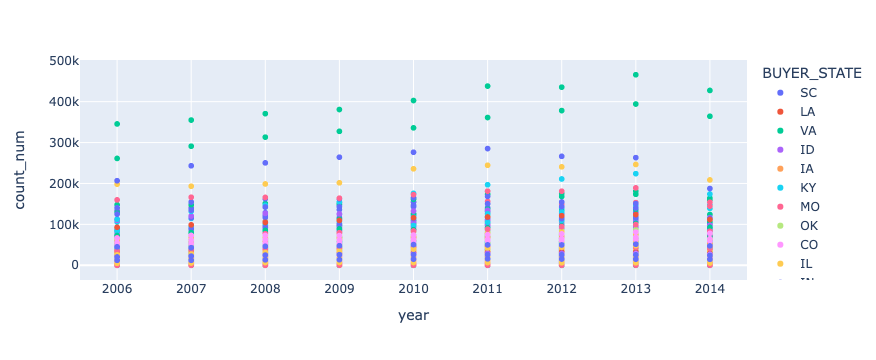

In [104]:

fig = px.scatter(annual_new, x = "year", y = "count_num", color = "BUYER_STATE")
fig.show()